# Proyek Analisis Data: Bike Sharing Dataset

- Nama: Cika Rahmannia Febrianti
- Email: cikarahmanniaa@gmail.com
- ID Dicoding: cikarahmanniaf

# Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pengaruh suhu terhadap jumlah peminjaman sepeda oleh pengguna casual dan registered?
- Pertanyaan 2: Pada musim dan kondisi cuaca apa peminjaman sepeda mencapai puncaknya?
- Pertanyaan 3: Bagaimana tren jumlah peminjaman sepeda setiap bulan selama tahun 2011 hingga 2012 untuk pengguna casual dan registered?

# Import Semua Packages/Library yang Digunakan

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from statsmodels.tsa.seasonal import seasonal_decompose

# Data Wrangling

Sebuah proses yang dilakukan sebagai persiapan sebelum data digunakan pada analisis, meliputi pengumpulan data (Gathering data), penilaian data (Assessing data), serta pembersihan data (Cleaning data).


## Gathering Data

### Dataset Description

- **instant**: Record index  
- **dteday**: Date  
- **season**: Season (1: spring, 2: summer, 3: fall, 4: winter)  
- **yr**: Year (0: 2011, 1: 2012)  
- **mnth**: Month (1 to 12)  
- **hr**: Hour (0 to 23)  
- **holiday**: Whether the day is a holiday or not  
- **weekday**: Day of the week  
- **workingday**:  
  - 1 if the day is neither weekend nor holiday  
  - 0 otherwise  
- **weathersit**:  
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy  
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
  - 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog  
- **temp**: Normalized temperature in Celsius (values are divided by 41)  
- **atemp**: Normalized feeling temperature in Celsius (values are divided by 50)  
- **hum**: Normalized humidity (values are divided by 100)  
- **windspeed**: Normalized wind speed (values are divided by 67)  
- **casual**: Count of casual users  
- **registered**: Count of registered users  
- **cnt**: Count of total rental bikes including both casual and registered  


In [10]:
day_df = pd.read_csv("day.csv",  delimiter=";")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,6,0,2,"0,344167","0,363625","0,805833","0,160446",331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,"0,363478","0,353739","0,696087","0,248539",131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,"0,196364","0,189405","0,437273","0,248309",120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,"0,2","0,212122","0,590435","0,160296",108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,"0,226957","0,22927","0,436957","0,1869",82,1518,1600


In [11]:
hour_df = pd.read_csv("hour.csv",  delimiter=";")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,0,6,0,1,"0,24","0,2879","0,81",0,3,13,16
1,2,01/01/2011,1,0,1,1,0,6,0,1,"0,22","0,2727","0,8",0,8,32,40
2,3,01/01/2011,1,0,1,2,0,6,0,1,"0,22","0,2727","0,8",0,5,27,32
3,4,01/01/2011,1,0,1,3,0,6,0,1,"0,24","0,2879","0,75",0,3,10,13
4,5,01/01/2011,1,0,1,4,0,6,0,1,"0,24","0,2879","0,75",0,0,1,1


## Assesing Data

### Menilai tabel day_df

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     731 non-null    int64 
 1   dteday      731 non-null    object
 2   season      731 non-null    int64 
 3   yr          731 non-null    int64 
 4   mnth        731 non-null    int64 
 5   holiday     731 non-null    int64 
 6   weekday     731 non-null    int64 
 7   workingday  731 non-null    int64 
 8   weathersit  731 non-null    int64 
 9   temp        731 non-null    object
 10  atemp       731 non-null    object
 11  hum         731 non-null    object
 12  windspeed   731 non-null    object
 13  casual      731 non-null    int64 
 14  registered  731 non-null    int64 
 15  cnt         731 non-null    int64 
dtypes: int64(11), object(5)
memory usage: 91.5+ KB


insight:
- jumlah non-null pada ke-16 variabel berjumlah sama, berarti tidak ada missing value.
- ada beberapa variabel dengan Dtype yang perlu diubah nantinya pada cleaning data

In [13]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

insight:
- penggunaan kode di atas menunjukkan ada atau tidaknya missing value. pada day_df tidak ditemukan adanya missing value

In [14]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [15]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,3410.000000,6946.000000,8714.000000


### Menilai tabel hour_df

In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17379 non-null  int64 
 3   yr          17379 non-null  int64 
 4   mnth        17379 non-null  int64 
 5   hr          17379 non-null  int64 
 6   holiday     17379 non-null  int64 
 7   weekday     17379 non-null  int64 
 8   workingday  17379 non-null  int64 
 9   weathersit  17379 non-null  int64 
 10  temp        17379 non-null  object
 11  atemp       17379 non-null  object
 12  hum         17379 non-null  object
 13  windspeed   17379 non-null  object
 14  casual      17379 non-null  int64 
 15  registered  17379 non-null  int64 
 16  cnt         17379 non-null  int64 
dtypes: int64(12), object(5)
memory usage: 2.3+ MB


insight:
- jumlah non-null pada ke-17 variabel berjumlah sama, berarti tidak ada missing value.
- ada beberapa variabel dengan Dtype yang perlu diubah nantinya pada cleaning data

In [17]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

insight:
- penggunaan kode di atas menunjukkan ada atau tidaknya missing value. pada day_df tidak ditemukan adanya missing value

In [18]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [19]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,367.000000,886.000000,977.000000


## Cleaning Data

### Tabel day_df

- tidak ada missing value
- tidak ada duplikasi data
- invalid, inaccurate, dan inconsistence value (perlu diperiksa)
- outlier (perlu diperiksa)

In [20]:
# tipe data "dteday" diubah dari object ke datetime

datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column], dayfirst=True)

In [21]:
# tipe data int diubah ke float karena value desimal

float_columns = ["temp", "atemp", "hum", "windspeed"]

for column in float_columns:
    day_df[column] = day_df[column].str.replace(",", ".").astype(float)

In [22]:
# tipe data untuk variabel kategorik diubah menjadi category

categorical_columns = ["season", "yr", "mnth", "holiday", "workingday", "weathersit"]

for column in categorical_columns:
    day_df[categorical_columns] = day_df[categorical_columns].astype('category')

In [23]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

In [24]:
day_df.describe()

,instant,dteday,weekday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.997264,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,5.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,6.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,2.004787,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [25]:
# memeriksa apakah ada data count yang tidak sesuai aturan 

inconsistent = day_df[day_df["cnt"] != day_df["casual"] + day_df["registered"]]

if inconsistent.empty:
    print("Data konsisten: 'cnt' sesuai dengan 'casual' + 'registered'")
else:
    print(f"Ada {len(inconsistent)} baris yang tidak konsisten.")
    print(inconsistent.head())

Data konsisten: 'cnt' sesuai dengan 'casual' + 'registered'


insight:
- tidak ada data invalid, inaccurate, dan inconsistent

In [26]:
num_columns = ["casual", "registered", "cnt"]
total_outliers = 0  

for column in num_columns:
    Q1 = day_df[column].quantile(0.25)
    Q3 = day_df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier = day_df[(day_df[column] < lower_bound) | (day_df[column] > upper_bound)]
    total_outliers += len(outlier) 

print(f"Total jumlah outlier: {total_outliers}")

Total jumlah outlier: 44


insight:
- outlier tidak dihilangkan karena dianggap mengandung informasi penting dari jumlah user

### Tabel hour_df

- tidak ada missing value
- tidak ada duplikasi data
- invalid, inaccurate, dan inconsistence value (perlu diperiksa)
- outlier (perlu diperiksa)

In [27]:
# tipe data "dteday" diubah dari object ke datetime

datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column], dayfirst=True)

In [28]:
# tipe data int diubah ke float karena value desimal

float_columns = ["temp", "atemp", "hum", "windspeed"]

for column in float_columns:
    hour_df[column] = hour_df[column].str.replace(",", ".").astype(float)

In [29]:
# tipe data untuk variabel kategorik diubah menjadi category

categorical_columns = ["season", "yr", "hr", "mnth", "holiday", "workingday", "weathersit"]

for column in categorical_columns:
    hour_df[categorical_columns] = hour_df[categorical_columns].astype('category')

In [30]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [31]:
hour_df.describe()

,instant,dteday,weekday,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,3.003683,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,5.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,6.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,2.005771,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [32]:
# memeriksa apakah ada data count yang tidak sesuai aturan 

inconsistent = hour_df[hour_df['cnt'] != hour_df['casual'] + hour_df['registered']]

if inconsistent.empty:
    print("Data konsisten: 'cnt' sesuai dengan 'casual' + 'registered'")
else:
    print(f"Ada {len(inconsistent)} baris yang tidak konsisten.")
    print(inconsistent.head())

Data konsisten: 'cnt' sesuai dengan 'casual' + 'registered'


insight:
- tidak ada data invalid, inaccurate, dan inconsistent

In [33]:
num_columns = ['casual', 'registered', 'cnt']
total_outliers = 0  

for column in num_columns:
    Q1 = day_df[column].quantile(0.25)
    Q3 = day_df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier = hour_df[(hour_df[column] < lower_bound) | (hour_df[column] > upper_bound)]
    total_outliers += len(outlier) 

print(f"Total jumlah outlier: {total_outliers}")

Total jumlah outlier: 0


# Exploratory Data Analysis (EDA)

## Explore day_df

In [34]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.0,731.0,731.0,731.000000,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,2.0,12.0,2.0,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,1.0,0.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,366.0,62.0,710.0,NaN,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,2.997264,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


insight: 
- kolom kategorikal (season, yr, mnth, holiday, weekday, workingday, weathersit) tidak memiliki nilai mean, min-max, std, dan lain-lain. sebaliknya, kolom numerik tidak memilki value dalam "unique", "top", dan "freq"

In [35]:
season_group = day_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std"],
})
print(season_group)

         cnt                                
         max   min         mean          std
season                                      
1       7836   431  2604.132597  1399.942119
2       8362   795  4992.331522  1695.977235
3       8714  1115  5644.303191  1459.800381
4       8555    22  4728.162921  1699.615261


C:\Users\cikar\AppData\Local\Temp\ipykernel_8800\1906716520.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_group = day_df.groupby(by="season").agg({


insight:
- Season (1: spring, 2: summer, 3: fall, 4: winter)
- jumlah pinjaman (campuran antara casual dan registered) tinggi pada season 3 (fall) baik secara mean maupun maksimum. sedangkan paling sedikit ada pada season 1 (spring) secara rata-rata, tetapi secara variasi atau sebaran, jumlah user pada season 4 (winter) bervariasi besar. kemungkinan adanya hari bercuaca ekstrem sehingga ada variasi nilai yang sangat besar.

In [36]:
workingday_group = day_df.groupby(by="workingday").agg({
    "cnt": ["max", "min", "mean", "std"],
})
print(workingday_group)

             cnt                               
             max  min         mean          std
workingday                                     
0           8714  605  4330.168831  2052.141245
1           8362   22  4584.820000  1878.415583


C:\Users\cikar\AppData\Local\Temp\ipykernel_8800\3517144153.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_group = day_df.groupby(by="workingday").agg({


insight:
- workingday: 1 if the day is neither weekend nor holiday, 0 otherwise
- pada hari libur maupun tidak, pola penggunaan hampir mirip, walaupun ada sedikit perbedaan jumlah min & maks pengguna di hari kerja yang lebih rendah.


In [37]:
weathersit_group = day_df.groupby(by="weathersit").agg({
    "cnt": ["max", "min", "mean", "std"],
})
print(weathersit_group)

C:\Users\cikar\AppData\Local\Temp\ipykernel_8800\1228473072.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weathersit_group = day_df.groupby(by="weathersit").agg({


             cnt                               
             max  min         mean          std
weathersit                                     
1           8714  431  4876.786177  1879.483989
2           8362  605  4035.862348  1809.109918
3           4639   22  1803.285714  1240.284449


weathersit:  
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy  
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
  - 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog

insight:
 
- dapat dilihat bahwa cuaca akan memengaruhi jumlah user. semakin bagus atau menuju ke cerah, maka rata rata semakin tinggi. sedangkan pada cuaca buruk (4), tidak ada sama sekali jumlah pengguna. kemungkinan jarang terjadi atau data tidak ter-record

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'cnt'}>, <Axes: >, <Axes: >]],
      dtype=object)

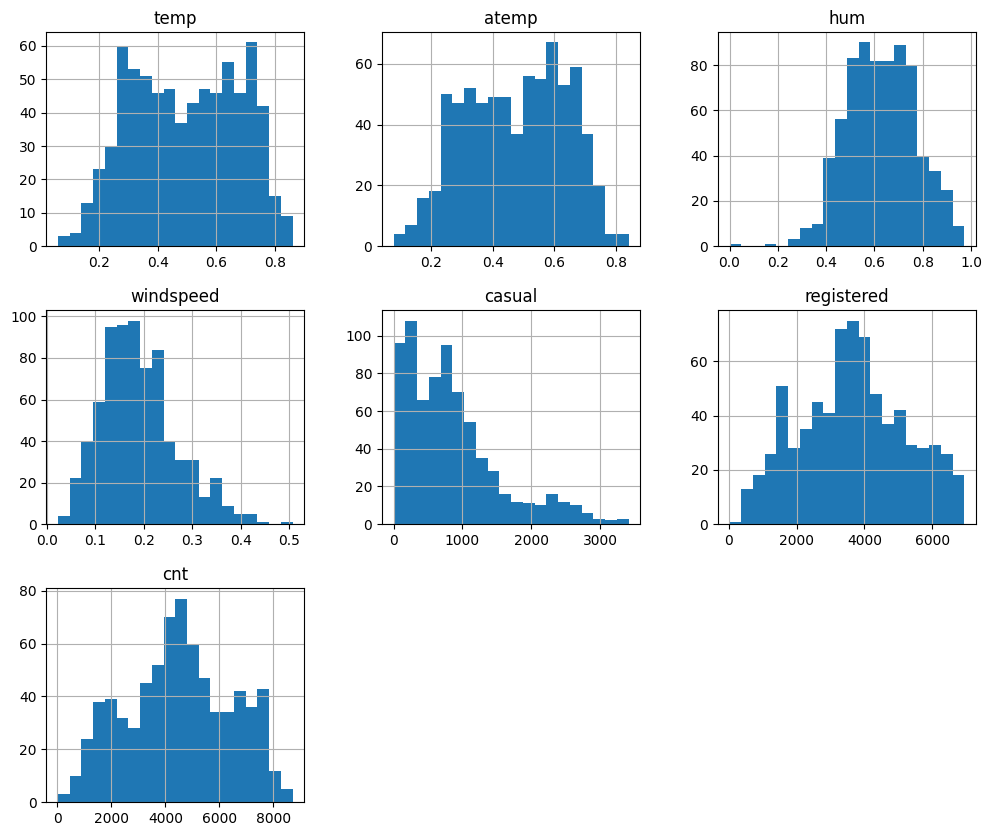

In [38]:
day_df[["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]].hist(figsize=(12, 10), bins=20)

insight:
- histogram digunakan untuk melihat distribusi data.
- apabila distribusi data memiliki jumlah n-puncak, maka data tersebut terdiri dari n-kelompok (contoh: "temp", "atemp"). kemungkinan karena adanya perbedaan musim yang signifikan.
- kelembaban dan kecepatan tinggi menyebabkan penurunan jumlah peminjam.
  

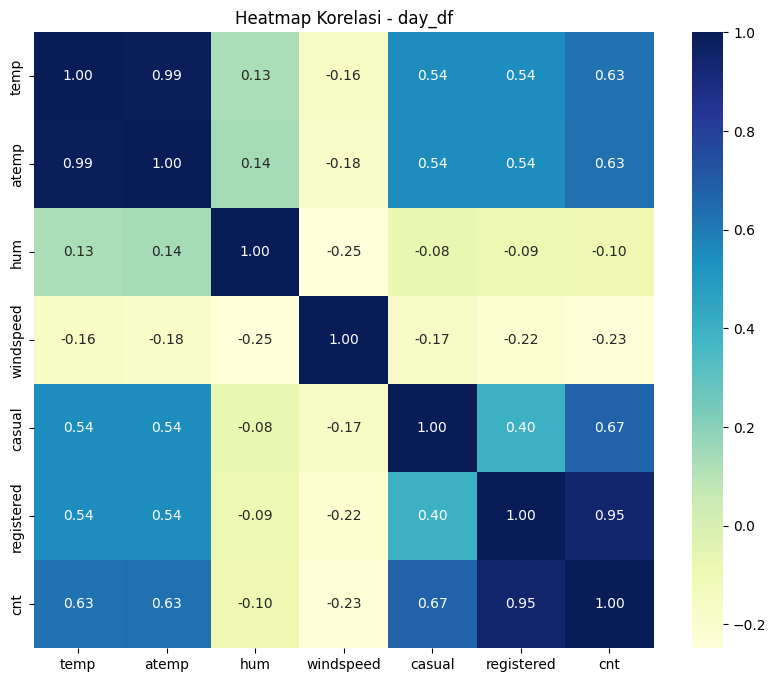

In [39]:
day_corr = day_df[["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(day_corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap Korelasi - day_df")
plt.show()

insight:
- heatmap digunakan untuk mengetahui seberapa besar hubungan antara kedua variabel (korelasi). 
- semakin mendekati -1 atau 1, maka hubungan kedua variabel kuat. tanda negatif atau positif menunjukkan arah hubungan keduanya.
- misal: nilai korelasi antara temp dan atemp menunjukkan nilai sebesar 0,99 berarti keduanya berhubungan kuat dan positif (searah)

## Explore hour_df

In [40]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,2.0,12.0,24.0,2.0,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,5.0,17.0,0.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,8734.0,1488.0,730.0,16879.0,NaN,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,3.003683,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [41]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [42]:
mnth_group = hour_df.groupby(by="mnth").agg({
    "cnt": ["max", "min", "mean", "std"],
})
print(mnth_group)

      cnt                            
      max min        mean         std
mnth                                 
1     559   1   94.424773   99.907146
2     610   1  112.865026  112.486565
3     957   1  155.410726  163.543050
4     822   1  187.260960  181.137902
5     873   1  222.907258  187.721497
6     900   1  240.515278  196.038950
7     913   1  231.819892  187.483806
8     941   1  238.097627  200.444648
9     977   1  240.773138  214.609531
10    963   1  222.158511  203.477057
11    729   1  177.335421  158.973887
12    759   1  142.303439  141.080674


C:\Users\cikar\AppData\Local\Temp\ipykernel_8800\3543126377.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mnth_group = hour_df.groupby(by="mnth").agg({


Insight:

- data di atas menunjukkan deskripsi statistik jumlah peminjaman di setiap bulannnya (paling banyak ada di bulan ke-9)

In [43]:
hr_group = hour_df.groupby(by="hr").agg({
    "cnt": ["max", "min", "mean", "std"],
})
print(hr_group)

    cnt                            
    max min        mean         std
hr                                 
0   283   2   53.898072   42.307910
1   168   1   33.375691   33.538727
2   132   1   22.869930   26.578642
3    79   1   11.727403   13.239190
4    28   1    6.352941    4.143818
5    66   1   19.889819   13.200765
6   213   1   76.044138   55.084348
7   596   1  212.064649  161.441936
8   839   5  359.011004  235.189285
9   426  14  219.309491   93.703458
10  539   8  173.668501  102.205413
11  663  10  208.143054  127.495536
12  776   3  253.315934  145.081134
13  760  11  253.661180  148.107657
14  750  12  240.949246  147.271574
15  750   7  251.233196  144.632541
16  783  11  311.983562  148.682618
17  976  15  461.452055  232.656611
18  977  23  425.510989  224.639304
19  743  11  311.523352  161.050359
20  567  11  226.030220  119.670164
21  584   6  172.314560   89.788893
22  502   9  131.335165   69.937782
23  256   2   87.831044   50.846889


C:\Users\cikar\AppData\Local\Temp\ipykernel_8800\2699713520.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hr_group = hour_df.groupby(by="hr").agg({


Insight:
- data di atas menunjukkan deskripsi statistik jumlah peminjaman di setiap jamnya. 
- jumlah peminjam paling banyak ada di antara pukul 7-20 (jam kerja)

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'cnt'}>, <Axes: >, <Axes: >]],
      dtype=object)

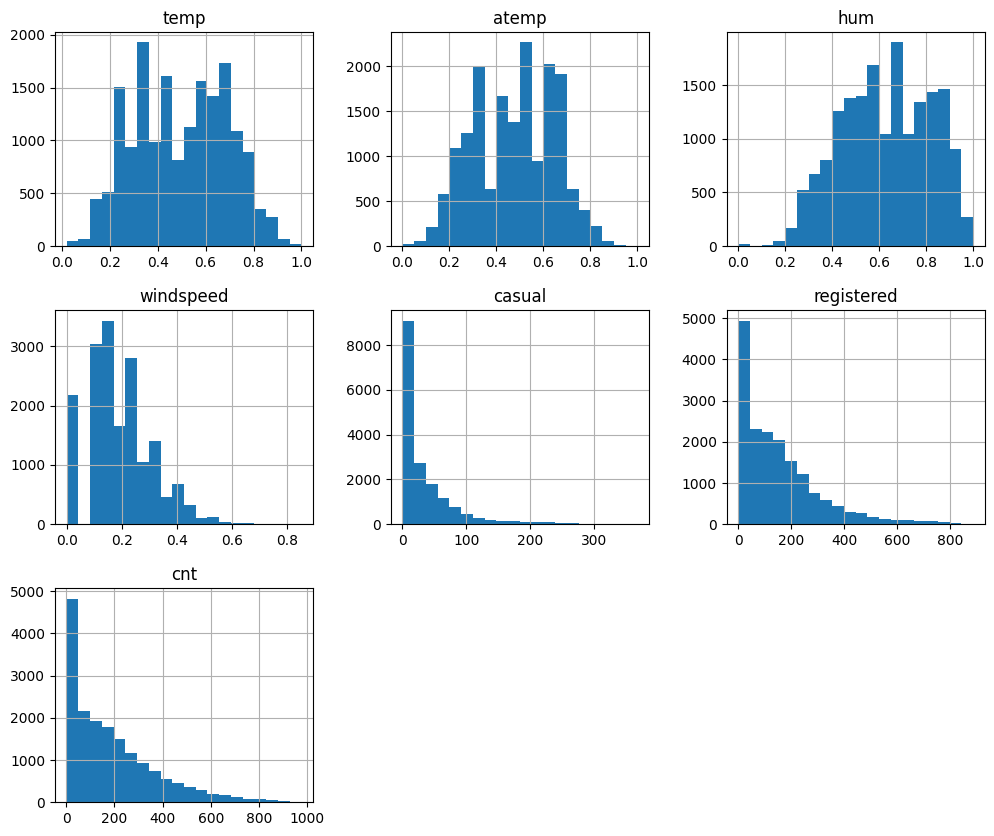

In [44]:
hour_df[["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]].hist(figsize=(12, 10), bins=20)

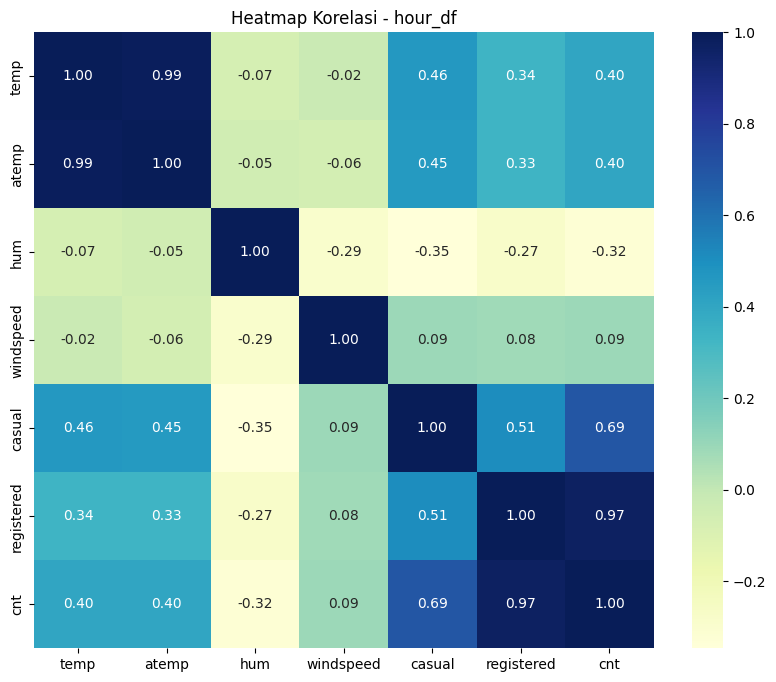

In [45]:
hour_corr = hour_df[["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(hour_corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap Korelasi - hour_df")
plt.show()

# Visualization & Explanatory Analysis

### Pertanyaan 1: 
#### Bagaimana pengaruh suhu terhadap jumlah peminjaman sepeda oleh pengguna casual dan registered?



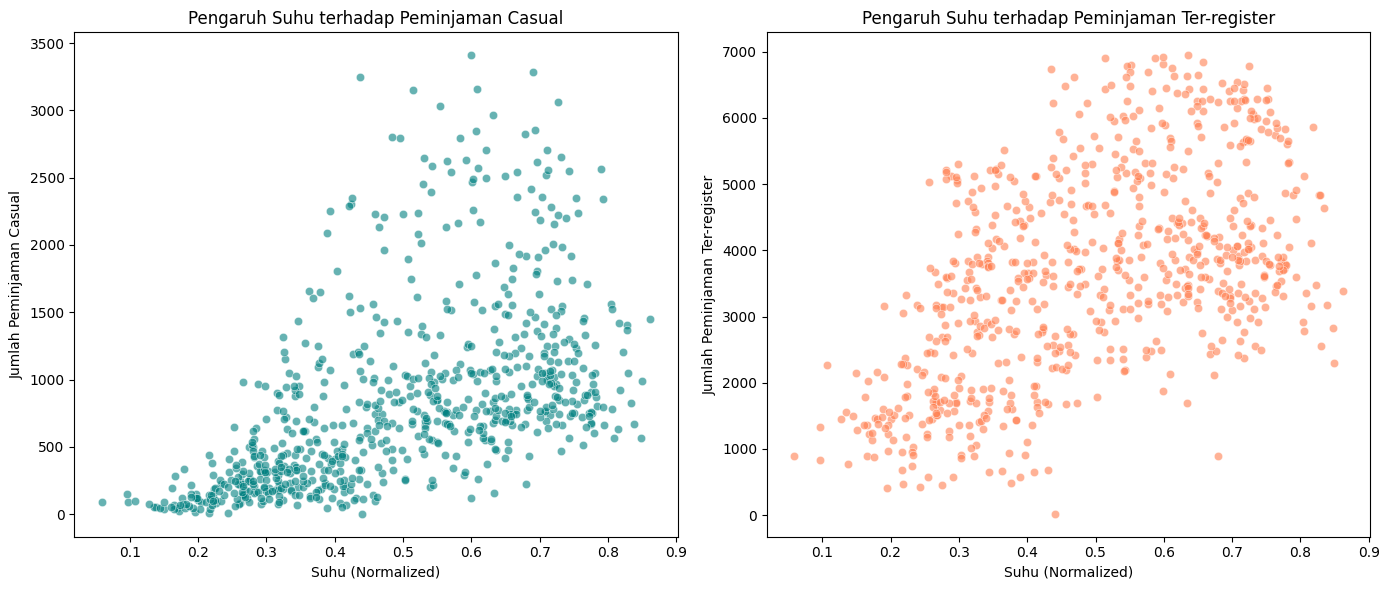

In [73]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x="temp", y="casual", data=day_df, alpha=0.6, color="teal")
plt.title("Pengaruh Suhu terhadap Peminjaman Casual")
plt.xlabel("Suhu (Normalized)")
plt.ylabel("Jumlah Peminjaman Casual")

plt.subplot(1, 2, 2)
sns.scatterplot(x="temp", y="registered", data=day_df, alpha=0.6, color="coral")
plt.title("Pengaruh Suhu terhadap Peminjaman Ter-register")
plt.xlabel("Suhu (Normalized)")
plt.ylabel("Jumlah Peminjaman Ter-register")
          
plt.tight_layout()
plt.show()

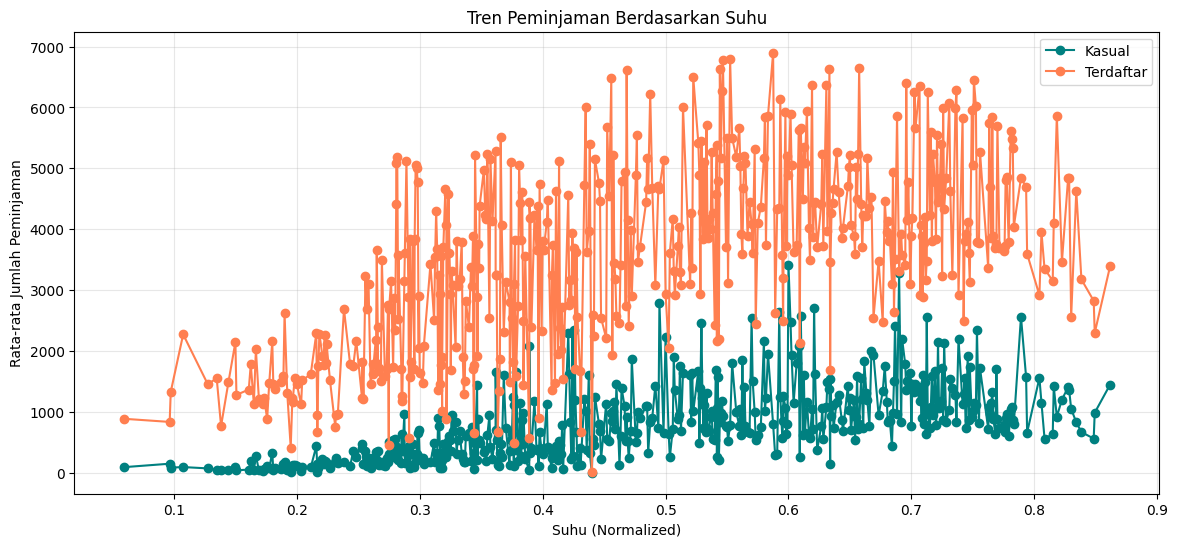

In [74]:
temp_grouped = day_df.groupby("temp").mean(numeric_only=True).reset_index()

plt.figure(figsize=(14, 6))

plt.plot(temp_grouped["temp"], temp_grouped["casual"], marker="o", linestyle="-", label="Kasual", color="teal")
plt.plot(temp_grouped["temp"], temp_grouped["registered"], marker="o", linestyle="-", label="Terdaftar", color="coral")

plt.title("Tren Peminjaman Berdasarkan Suhu")
plt.xlabel("Suhu (Normalized)")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [60]:
optimal_casual = temp_grouped.loc[temp_grouped['casual'].idxmax()]
optimal_registered = temp_grouped.loc[temp_grouped['registered'].idxmax()]

print(f"Suhu optimal untuk pengguna kasual: {optimal_casual['temp']} dengan {optimal_casual['casual']} peminjaman.")
print(f"Suhu optimal untuk pengguna terdaftar: {optimal_registered['temp']} dengan {optimal_registered['registered']} peminjaman.")

Suhu optimal untuk pengguna kasual: 0.6 dengan 3410.0 peminjaman.
Suhu optimal untuk pengguna terdaftar: 0.5875 dengan 6898.0 peminjaman.


Insights
- Scatter plot: ada tren positif antara suhu dengan jumlah peminjaman kasual dan terdaftar, sehingga semakin naik suhu (batas wajar) maka semakin banyak peminjam.
- Line chart: Kedua kelompok menunjukkan puncak peminjaman pada suhu sekitar 0.5–0.7 (normalisasi), yang bisa berarti suhu yang nyaman untuk bersepeda. fluktuasi pengguna kasual lebih besar dibanding terdaftar (pengguna terdaftar lebih konsisten).
- Pada line chart, diketahui informasi secara grafis bahwa puncak peminjaman ada di titik 0,5 hingga 0,7. Hal tersebut sejalan dengan pencarian numerik, didapatkan suhu optimal untuk kasual dan terdaftar sebesar 0,6 dan 0,5872 (normalisasi).

### Pertanyaan 2: 
#### Pada musim dan kondisi cuaca apa peminjaman sepeda mencapai puncaknya??

In [76]:
season_labels = ["Spring", "Summer", "Fall", "Winter"]
season_counts = day_df.groupby("season")["cnt"].mean().tolist()

weather_labels = ["Clear", "Mist + Cloudy", "Light Snow/Rain", "Heavy Rain/Snow+Fog"] # label ke-4 tidak ada value di data
weather_counts = day_df.groupby("weathersit")["cnt"].mean().reindex([1, 2, 3, 4], fill_value=0).tolist() # perlu re-index untuk bisa tetap 4 label dengan label ke-4 diisi 4

C:\Users\cikar\AppData\Local\Temp\ipykernel_8800\3793287319.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_counts = day_df.groupby("season")["cnt"].mean().tolist()
C:\Users\cikar\AppData\Local\Temp\ipykernel_8800\3793287319.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_counts = day_df.groupby("weathersit")["cnt"].mean().reindex([1, 2, 3, 4], fill_value=0).tolist() # perlu re-index untuk bisa tetap 4 label dengan label ke-4 diisi 4


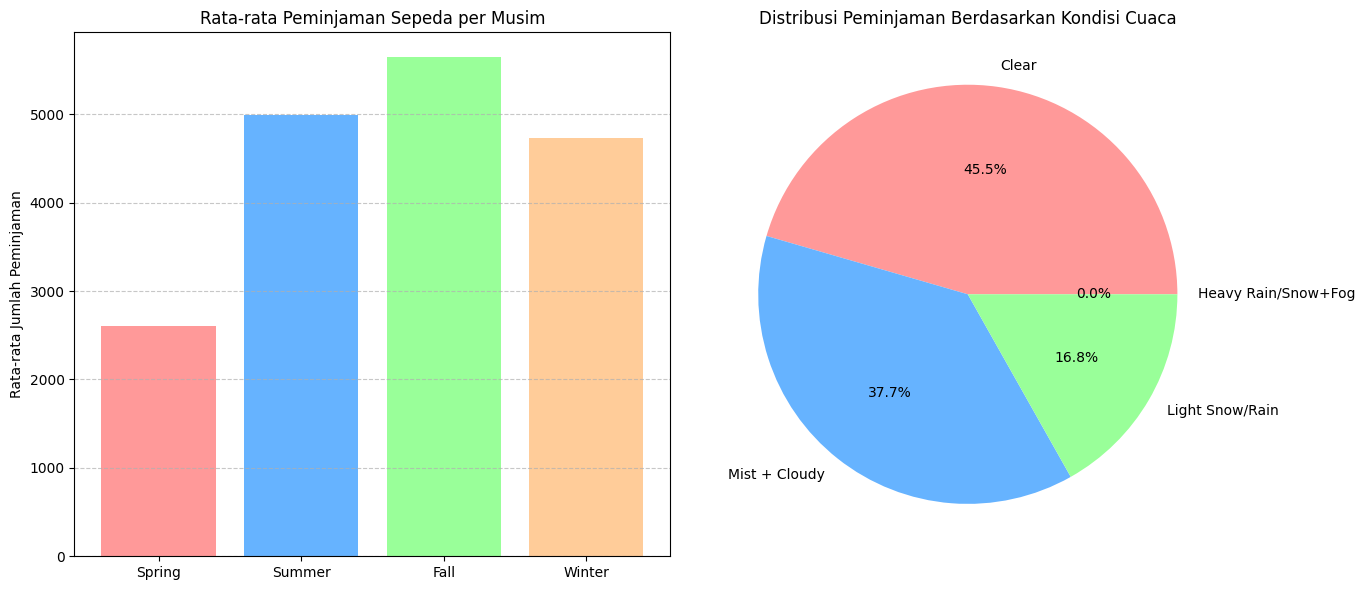

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.bar(season_labels, season_counts, color=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"])
ax1.set_title("Rata-rata Peminjaman Sepeda per Musim")
ax1.set_ylabel("Rata-rata Jumlah Peminjaman")
ax1.grid(axis="y", linestyle="--", alpha=0.7)

ax2.pie(weather_counts, labels=weather_labels, autopct="%1.1f%%", colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"])
ax2.set_title("Distribusi Peminjaman Berdasarkan Kondisi Cuaca")

plt.tight_layout()
plt.show()

Insights:
- Bar chart: rata-rata peminjaman tertinggi ada di musim gugur, dengan yang terendah ada pada musim semi.
- Pie chart: peminjaman paling banyak ketika cuaca sedang cerah, dan tidak ada sama sekali (atau tidak ter-record) saat cuaca ekstrem (heavy rain/snow+fog)

### Pertanyaan 3: 
#### Bagaimana tren jumlah peminjaman sepeda setiap bulan selama tahun 2011 hingga 2012 untuk pengguna casual dan registered?

In [82]:
monthly_trend = day_df.groupby(["yr", "mnth"])[["casual", "registered"]].mean().reset_index()
monthly_trend["Bulan"] = monthly_trend["yr"].astype(str) + "-" + monthly_trend["mnth"].astype(str)

C:\Users\cikar\AppData\Local\Temp\ipykernel_8800\2389434892.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trend = day_df.groupby(["yr", "mnth"])[["casual", "registered"]].mean().reset_index()


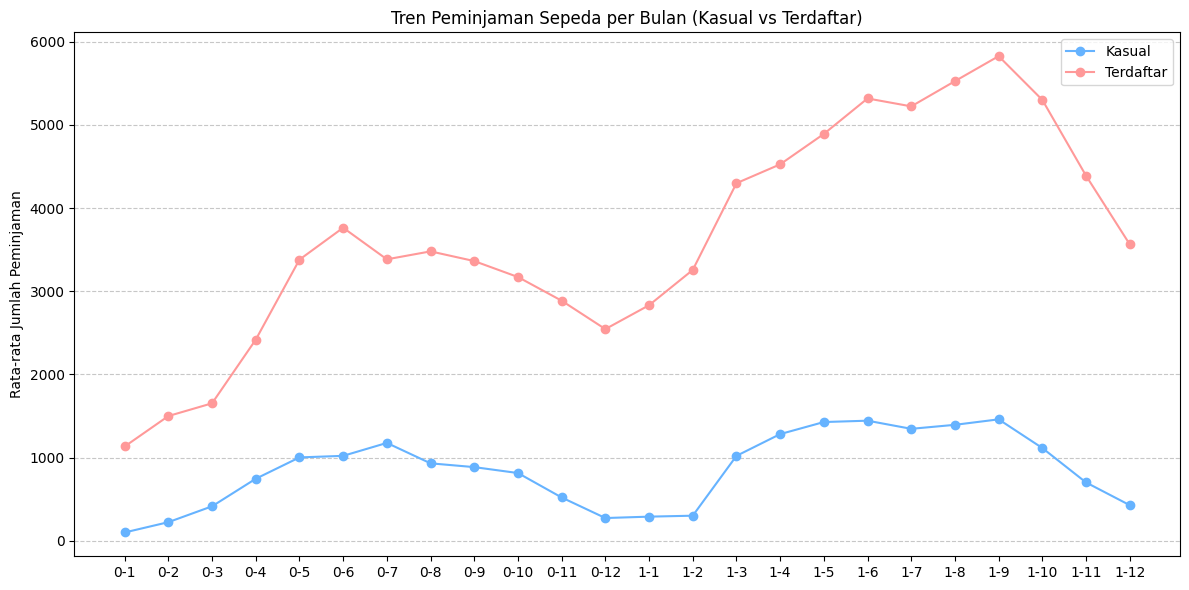

In [85]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(monthly_trend["Bulan"], monthly_trend["casual"], marker='o', color="#66b3ff", label="Kasual")
ax.plot(monthly_trend["Bulan"], monthly_trend["registered"], marker='o', color="#ff9999", label="Terdaftar")

ax.set_title("Tren Peminjaman Sepeda per Bulan (Kasual vs Terdaftar)")
ax.set_ylabel("Rata-rata Jumlah Peminjaman")
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.set_xticks(monthly_trend["Bulan"])
ax.legend()

plt.tight_layout()
plt.show()

* arti label 0-1 berarti tahun "0" dan bulan "1"

Insights:
- Grafik menunjukkan bahwa peminjaman sepeda oleh pengguna terdaftar jauh lebih tinggi dibandingkan pengguna kasual. Kedua jenis pengguna mengalami penurunan signifikan saat memasuki musim dingin, menunjukkan bahwa faktor cuaca memengaruhi minat peminjaman sepeda.

# Analisis Lanjutan (Opsional)

### Pertanyaan 1: Pearson Correlation

In [106]:
corr_casual, _ = pearsonr(day_df["temp"], day_df["casual"]) # p-value diabaikan
corr_registered, _ = pearsonr(day_df["temp"], day_df["registered"])

print(f"Koefisien Korelasi antara Suhu dan Peminjaman Kasual: {corr_casual}")
print(f"Koefisien Korelasi antara Suhu dan Peminjaman Terdaftar: {corr_registered}")

Koefisien Korelasi antara Suhu dan Peminjaman Kasual: 0.5432846616821877
Koefisien Korelasi antara Suhu dan Peminjaman Terdaftar: 0.5400119661617865


Insight:
- pada analisis sebelumnya, hanya dilakukan secara grafis. di atas dilakukan pengujian secara inferensial dengan korelasi pearson dan didapat nilai korelasi sebesar 0,55 untuk kedua variabel

### Pertanyaan 2: Cross Tabulation

In [97]:
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
weather_labels = {1: "Clear", 2: "Mist + Cloudy", 3: "Light Snow/Rain", 4: "Heavy Rain/Snow+Fog"}

day_df["season_label"] = day_df["season"].map(season_labels)
day_df["weather_label"] = day_df["weathersit"].map(weather_labels)

cross_tab = pd.pivot_table(day_df, values="cnt", index="season_label", columns="weather_label", aggfunc="mean")
print("Tabulasi Silang Rata-rata Peminjaman:")
print(cross_tab)

Tabulasi Silang Rata-rata Peminjaman:
weather_label        Clear  Mist + Cloudy  Light Snow/Rain
season_label                                              
Spring         2811.135135    2357.166667           934.75
Summer         5548.548673    4236.705882          1169.00
Fall           5878.257353    5222.479167          2751.75
Winter         5043.563107    4654.000000          1961.60


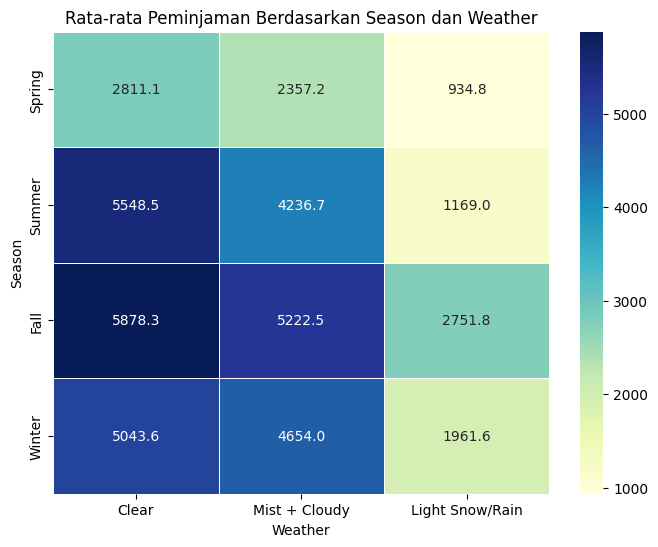

In [100]:
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Rata-rata Peminjaman Berdasarkan Season dan Weather")
plt.xlabel("Weather")
plt.ylabel("Season")
plt.show()

Insights:
- Musim Gugur (Fall) memiliki rata-rata peminjaman tertinggi, terutama saat cuaca Clear (5878.26) dan Mist + Cloudy (5222.48).
- Musim Panas (Summer) juga menunjukkan tren peminjaman yang tinggi, khususnya pada cuaca Clear (5548.55).
- Adanya peningkatkan jumlah peminjaman pada musim dan cuaca di atas dinilai wajar karena cuaca dan musim mendukung.
- Peminjaman pada cuaca menuju ekstrem, akan menurunkan minat peminjaman sepeda oleh pengguna.

### Pertanyaan 3: Metode Manual Binning

In [ ]:
monthly_trend = day_df.resample("M")[["casual", "registered"]].mean()
monthly_trend["month"] = monthly_trend.index.month
monthly_trend["year"] = monthly_trend.index.year

In [ ]:
bins = [0, 500, 1500, float("inf")]
labels = ["Rendah", "Sedang", "Tinggi"]

monthly_trend["casual_bin"] = pd.cut(monthly_trend["casual"], bins=bins, labels=labels)
monthly_trend["registered_bin"] = pd.cut(monthly_trend["registered"], bins=bins, labels=labels)

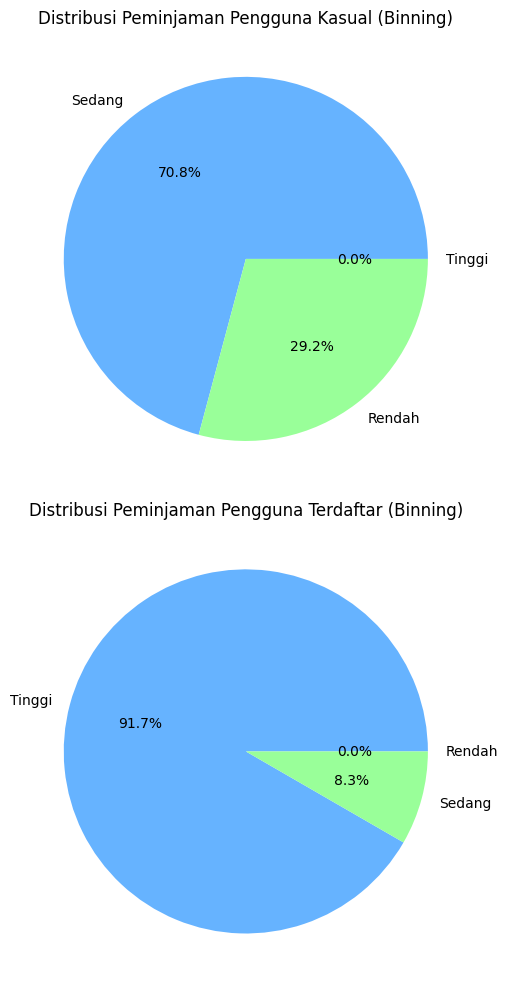

In [107]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

casual_counts = monthly_trend["casual_bin"].value_counts()
ax[0].pie(casual_counts, labels=casual_counts.index, autopct='%1.1f%%', colors=["#66b3ff", "#99ff99", "#ff9999"])
ax[0].set_title("Distribusi Peminjaman Pengguna Kasual (Binning)")

registered_counts = monthly_trend["registered_bin"].value_counts()
ax[1].pie(registered_counts, labels=registered_counts.index, autopct='%1.1f%%', colors=["#66b3ff", "#99ff99", "#ff9999"])
ax[1].set_title("Distribusi Peminjaman Pengguna Terdaftar (Binning)")

plt.tight_layout()
plt.show()

In [109]:
print(monthly_trend[["year", "month", "casual", "registered", "casual_bin", "registered_bin"]])

            year  month       casual   registered casual_bin registered_bin
dteday                                                                     
2011-01-31  2011      1    99.129032  1132.774194     Rendah         Sedang
2011-02-28  2011      2   222.928571  1499.035714     Rendah         Sedang
2011-03-31  2011      3   413.741935  1652.225806     Rendah         Tinggi
2011-04-30  2011      4   744.866667  2417.466667     Sedang         Tinggi
2011-05-31  2011      5  1001.612903  3379.709677     Sedang         Tinggi
2011-06-30  2011      6  1020.400000  3763.333333     Sedang         Tinggi
2011-07-31  2011      7  1175.870968  3383.516129     Sedang         Tinggi
2011-08-31  2011      8   930.387097  3479.000000     Sedang         Tinggi
2011-09-30  2011      9   884.833333  3362.433333     Sedang         Tinggi
2011-10-31  2011     10   813.612903  3170.612903     Sedang         Tinggi
2011-11-30  2011     11   519.800000  2885.766667     Sedang         Tinggi
2011-12-31  

Insights:
- Pengguna Terdaftar (Registered) secara konsisten masuk dalam kategori Tinggi sepanjang tahun 2011 hingga 2012, menunjukkan adanya pengguna yang stabil dan sering menggunakan layanan peminjaman sepeda. Hal ini mengindikasikan kebutuhan rutin dari pengguna terdaftar.

- Pengguna Kasual (Casual) menunjukkan pola yang lebih bervariasi. Pada bulan-bulan awal dan akhir tahun (musim dingin), peminjaman masuk dalam kategori Rendah, sedangkan pada musim semi hingga musim panas, kategori naik menjadi Sedang. Ini menunjukkan bahwa pengguna kasual lebih terpengaruh oleh kondisi cuaca yang lebih hangat dan aktivitas musiman.

- Data ini memperlihatkan bahwa pengguna terdaftar memiliki kebiasaan peminjaman yang lebih stabil dibandingkan pengguna kasual, yang cenderung fluktuatif mengikuti musim.

# Conclusion

- Pertanyaan 1: Bagaimana pengaruh suhu terhadap jumlah peminjaman sepeda oleh pengguna casual dan registered?- 
Pertanyaan 2: Pada musim dan kondisi cuaca apa peminjaman sepeda mencapai puncaknya
- 
Pertanyaan 3: Bagaimana tren jumlah peminjaman sepeda setiap bulan selama tahun 2011 hingga 2012 untuk pengguna casual dan registered?

1. Analisis menunjukkan adanya tren positif antara suhu dan jumlah peminjaman sepeda, baik untuk pengguna kasual maupun terdaftar, dengan nilai korelasi Pearson sebesar 0,55 yang mengindikasikan hubungan positif sedang. Suhu optimal untuk peminjaman tertinggi tercatat sekitar 0,6 untuk kasual dan 0,5872 untuk terdaftar (normalisasi), sesuai dengan puncak pada line chart di rentang 0,5–0,7. Pengguna kasual memiliki fluktuasi lebih besar, sedangkan pengguna terdaftar lebih konsisten dalam meminjam sepeda

2. Analisis menunjukkan bahwa Musim Gugur (Fall) memiliki rata-rata peminjaman tertinggi, terutama saat cuaca Clear (5878.26) dan Mist + Cloudy (5222.48), diikuti oleh Musim Panas (Summer) pada cuaca Clear (5548.55). Cuaca pada kedua musim ini mendukung peningkatan jumlah peminjaman, sementara kondisi cuaca ekstrem cenderung menurunkan minat pengguna. Hal ini menunjukkan bahwa musim dan cuaca memiliki pengaruh signifikan terhadap tren peminjaman sepeda.

3. Analisis menunjukkan bahwa pengguna terdaftar (Registered) memiliki kebiasaan peminjaman yang stabil dan konsisten dalam kategori Tinggi sepanjang tahun 2011 hingga 2012, mengindikasikan adanya kebutuhan rutin. Sebaliknya, pengguna kasual (Casual) menunjukkan pola yang lebih fluktuatif. Penurunan signifikan pada kedua jenis pengguna saat musim dingin menegaskan bahwa faktor cuaca memainkan peran penting dalam minat peminjaman sepeda.